# Data Acquisition & Preparation #


In order to continue with our analysis we first need to see the condition of our data. <br />
And then prepare the in order to use them correctly

## Load packages ##

In [4]:
import pandas as pd 
from sklearn.preprocessing import MultiLabelBinarizer

## Load Data

We will only use the listings.csv file because seasons are the thing we want to investigate

In [5]:
import matplotlib.pyplot as plt
list_df=pd.read_csv('C:/Users/chris/Desktop/Ex_Files_Learning_Python/listings.csv',sep=',')

## View Data ##

Quick look at how the amenities column looks like

In [6]:
# Quick look at amenities
print(list_df['amenities'].head())

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object


#### We see that amenities are in a strange format. <br />
#### So let's get rid of the unnecessary symbols and place the data values into arrays each time

In [7]:
amenities = list_df['amenities'].apply(lambda x: [amenity.replace(
    '"', "").replace("{", "").replace("}", "") for amenity in x.split(",")])
print(amenities)  

0       [TV, Cable TV, Internet, Wireless Internet, Ai...
1       [TV, Internet, Wireless Internet, Kitchen, Fre...
2       [TV, Cable TV, Internet, Wireless Internet, Ai...
3       [Internet, Wireless Internet, Kitchen, Indoor ...
4       [TV, Cable TV, Internet, Wireless Internet, Ki...
                              ...                        
3813    [TV, Cable TV, Internet, Wireless Internet, Ai...
3814    [TV, Cable TV, Internet, Wireless Internet, Ki...
3815    [Cable TV, Wireless Internet, Kitchen, Free Pa...
3816    [TV, Wireless Internet, Kitchen, Free Parking ...
3817    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenities, Length: 3818, dtype: object


## MultiLabelBinarizer

We need to see each amenity in the arrays as labels in order to count them.<br />
That's why we will use MultiLabelbinarizer because it allows you to encode multiple labels.<br />
So by using MultiLabelbinarizer we split the amenities into single labels and then we will count how many there are in total.

In [8]:
# Using MultiLabelBinarizer in order to split the amenitites
mlb = MultiLabelBinarizer()
amenities_label = pd.DataFrame(mlb.fit_transform(
    amenities), columns=mlb.classes_, index=amenities.index)

#### Let's sum the amenities labels and see how many of them we have

In [9]:
# Sum the amenities labels
amenities_count=amenities_label.sum().sort_values(ascending=False)
print(len(amenities_label.columns))

42


#### 42 are quite a lot so i will just pick the 10 most used in order to go to the next step of visualization

# Visualization

Time for bar chart to visualize how our analysis is going

## Bar chart for the 10 most used amenities and their frequency

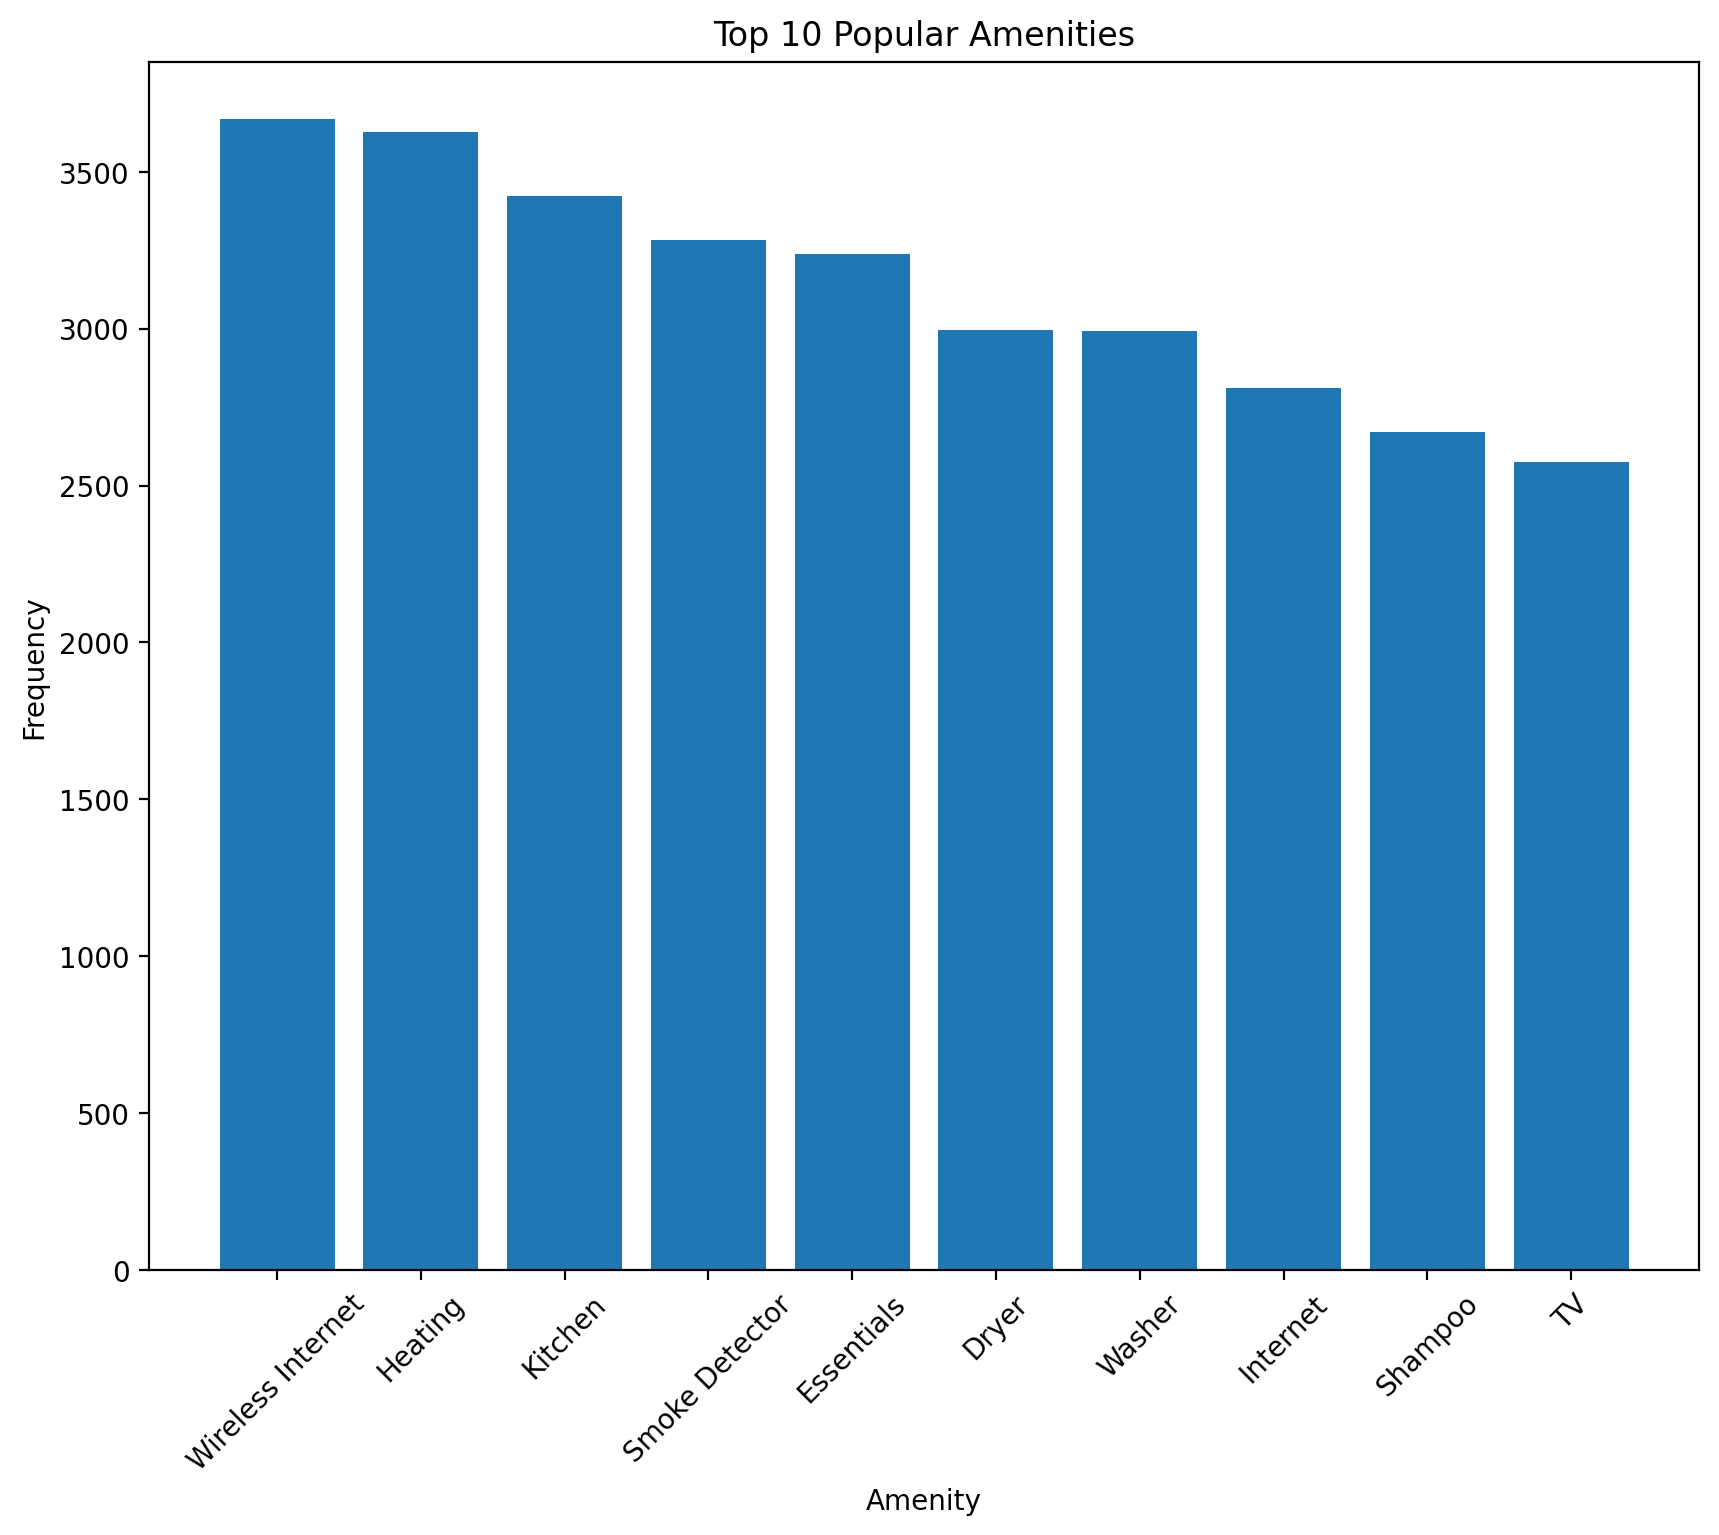

In [10]:
"""Creating a bar chart with : x = Amenities
                               y = Frequency of their appearance
     in order to have a visualization of the code we used"""  


plt.figure(figsize=(10,8),dpi=200)
plt.bar(amenities_count[:10].index,amenities_count[:10].values)
plt.title('Top 10 Popular Amenities')
plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Question

Which are the most common amenities?

# Conclusion# 
<br />
We see that the most common amenities are Wifi, Heating, Kitchen, Smoke Detector, Essentials, Dryer, Washer, Internet, Shampoo and TV.<br />
So this is our answer to the first question.<br />
(What are the most common amenities)<br />
The strange part is that amenities like Smoke Detectors are more common than shampoos and TV.